# MNIST

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [14]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    for i, path in enumerate(paths):
        if i == 0: data = pd.read_csv(path)
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(path)])
            except:
                pass
    return data

# Digits

In [12]:
save_path = "../Output/*/*.csv"

ValueError: Could not interpret input 'Dataset'

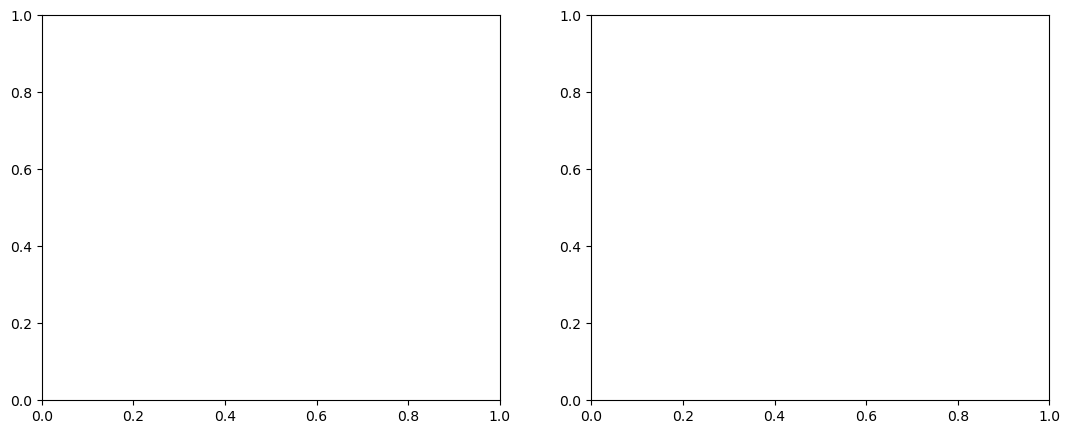

In [15]:
import seaborn as sns


datas = list()
save_path = "../Output/*/*.csv"
path_list = glob.glob(save_path)
data_temp = get_concat_glob(path_list)

fig, axes = plt.subplots(1, 2, figsize=(13,5), dpi=100)
ax = axes[0]
ax = sns.barplot(data=data_temp, x="mode", y="test_acc", hue="Setting", ax=ax, errorbar="se")
ax.set_ylabel("Test accuracy (%)"), ax.legend(loc=4, prop={'size': 8}), 
# ax.set_ylim([40, 97])

ax = axes[1]
ax = sns.barplot(data=data_temp, x="Setting", y="test_acc", ax=ax, errorbar="se")
ax.set_ylabel("Test accuracy (%)"), ax.legend(loc=4, prop={'size': 8}), 
ax.set_ylim([35, 54])
_ = plt.xticks(rotation=30, ha='right')
fig.tight_layout()

In [194]:
data_temp[data_temp["Setting"]=="FedAvg"].mean(), data_temp[data_temp["Setting"]=="FedBN"].mean()

/tmp/ipykernel_1144966/468418988.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_temp[data_temp["Setting"]=="FedAvg"].mean(), data_temp[data_temp["Setting"]=="FedBN"].mean()


(Unnamed: 0     1.500000
 epoch         99.000000
 norm           0.000000
 lr             0.010000
 lr_decay       0.000000
 test_loss      1.383719
 test_acc      63.081619
 dtype: float64,
 Unnamed: 0     1.500000
 epoch         99.000000
 norm           0.000000
 lr             0.010000
 lr_decay       0.000000
 test_loss      1.086605
 test_acc      69.995329
 dtype: float64)

0.5 1
1.0 1
1.2 1
0.5 3
1.0 3
1.2 3


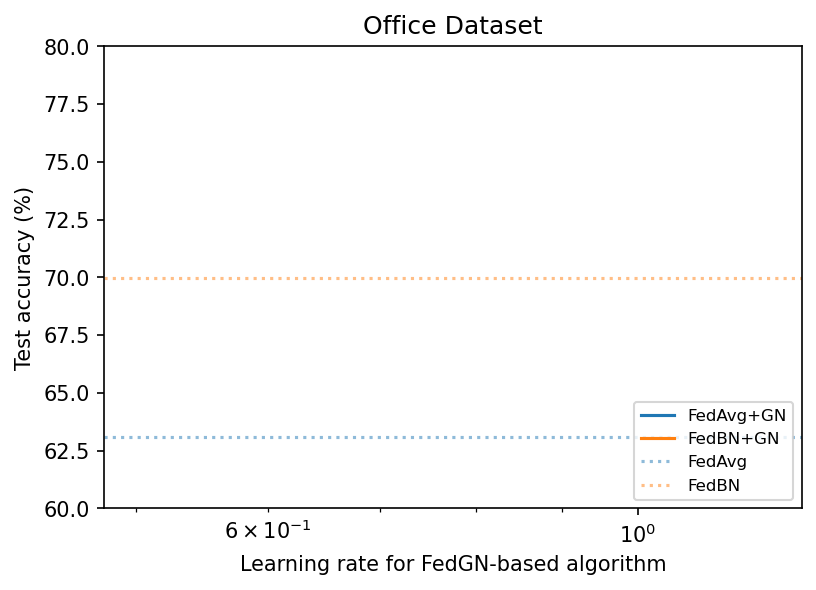

In [12]:
import seaborn as sns

settings = [
            "fedavg+gn_lr0.3_d0.3",
            "fedavg+gn_lr0.5_d0.5",
            "fedavg+gn_lr0.7_d0.7",
            "fedavg+gn_lr1.0_d1.0",
            "fedavg+gn_lr1.2_d1.2",
            "fedavg+gn_lr1.5_d1.5",
            "fedavg+gn_lr1.8_d1.8",
            "fedavg+gn_lr2.0_d2.0",
            # "fedavg+gn_lr3.0_d3.0",
            # "fedavg+gn_lr5.0_d5.0",
            # "fedavg+gn_lr10.0_d10.0",
            # "fedavg_lr0.01",
            # "fedbn_lr0.01",
            "fedbn+gn_lr0.3_d0.3",
            "fedbn+gn_lr0.5_d0.5",
            "fedbn+gn_lr0.7_d0.7",
            "fedbn+gn_lr1.0_d1.0",
            "fedbn+gn_lr1.2_d1.2",
            "fedbn+gn_lr1.5_d1.5",
            "fedbn+gn_lr1.8_d1.8",
            "fedbn+gn_lr2.0_d2.0",
            ]

names = settings

datas = list()
for i, setting in enumerate(settings):
    try:
        df = get_concat(setting, [1,2,3,4,5,6,7,8,9,10])
        # df = df.loc[df['epoch'] == 49]
        df['test_acc'] *= 100
        if "avg" in names[i]:
            df['Setting'] = "FedAvg+GN"
        if "bn" in names[i]:
            df['Setting'] = "FedBN+GN"
        df['Dataset'] = df['dataset']
        df["Scale"] = float(setting.split("lr")[1].split("_")[0])
        print(float(setting.split("lr")[1].split("_")[0]), len(df)//5)
        datas += [df]
    except:
        pass
data_temp = pd.concat(datas)
fig, ax = plt.subplots(figsize=(6,4), dpi=150)

ax = sns.lineplot(data=data_temp, x="Scale", y="test_acc", 
                  hue="Setting",
                  ax=ax, errorbar="se",
                  )
ax.axhline(y=63.081619, color="tab:blue", linestyle=":", alpha=0.5, label="FedAvg")
ax.axhline(y=69.995329, color="tab:orange", linestyle=":", alpha=0.5, label="FedBN")
# ax.axhline(y=0, color="tab:blue", linestyle=":", alpha=0.5, label="FedAvg+GN")
# ax.axhline(y=0, color="tab:orange", linestyle=":", alpha=0.5, label="FedBN+GN")

ax.set_ylabel("Test accuracy (%)"), 
ax.set_xlabel("Learning rate for FedGN-based algorithm")

ax.set_ylim([60, 80])
ax.set(xscale='log')
ax.set_title("Office Dataset")
# ax.legend()
_ = ax.legend(loc=4, prop={'size': 8})

(Text(0.5, 0, 'Learning rate FedGN-based algorithm'),)

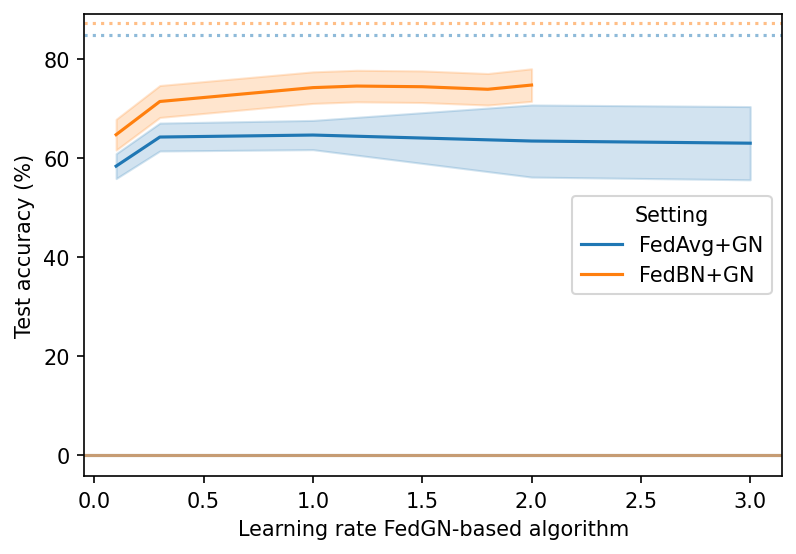

In [169]:
import seaborn as sns

settings = [
            "fedavg+gn_lr0.01_d0.01",
            "fedavg+gn_lr0.03_d0.03",
            "fedavg+gn_lr0.1_d0.1",
            "fedavg+gn_lr0.3_d0.3",
            "fedavg+gn_lr1.0_d1.0",
            "fedavg+gn_lr1.2_d1.2",
            "fedavg+gn_lr1.5_d1.5",
            "fedavg+gn_lr1.8_d1.8",
            "fedavg+gn_lr2.0_d2.0",
            "fedavg+gn_lr3.0_d3.0",
            # "fedavg+gn_lr10.0_d10.0",
            # "fedavg+gn_lr30.0_d30.0",


            "fedbn+gn_lr0.01_d0.01",
            "fedbn+gn_lr0.03_d0.03",
            "fedbn+gn_lr0.1_d0.1",
            "fedbn+gn_lr0.3_d0.3",
            "fedbn+gn_lr1.0_d1.0",
            "fedbn+gn_lr1.2_d1.2",
            "fedbn+gn_lr1.5_d1.5",
            "fedbn+gn_lr1.8_d1.8",
            "fedbn+gn_lr2.0_d2.0",
            "fedbn+gn_lr3.0_d3.0",
            # "fedbn+gn_lr10.0_d10.0",
            # "fedbn+gn_lr30.0_d30.0",
            ]

names = settings

datas = list()
for i, setting in enumerate(settings):
    try:
        df = get_concat(setting, [1,2,3,4,5,6,7,8,9,10])
        df['test_acc'] *= 100
        if "avg" in names[i]:
            df['Setting'] = "FedAvg+GN"
        if "bn" in names[i]:
            df['Setting'] = "FedBN+GN"
        df['Dataset'] = df['dataset']
        df["Scale"] = float(setting.split("lr")[1].split("_")[0])
        datas += [df]
    except:
        pass
data_temp = pd.concat(datas)
fig, ax = plt.subplots(figsize=(6,4), dpi=150)

ax = sns.lineplot(data=data_temp, x="Scale", y="test_acc", 
                  hue="Setting",
                  ax=ax, errorbar="se",
                  )
ax.axhline(y=0, color="tab:blue", alpha=0.5, label="FedBN+GN")
ax.axhline(y=0, color="tab:orange", alpha=0.5, label="FedAvg+GN")
ax.axhline(y=84.838180, color="tab:blue", linestyle=":", alpha=0.5, label="FedAvg")
ax.axhline(y=87.311673, color="tab:orange", linestyle=":", alpha=0.5, label="FedBN")

ax.set_ylabel("Test accuracy (%)"), 
ax.set_xlabel("Learning rate FedGN-based algorithm"),

ax.set_ylim([80, 95])
ax.set(xscale='log')
ax.set_title("Digits Dataset")
# ax.legend()
_ = ax.legend(loc=4, prop={'size': 8})